car price prediction


In [ ]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
df = pd.read_csv('Cleaned_Car_data.csv')
df

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [4]:
print("Missing values before handling:\n", df.isnull().sum())
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

Missing values before handling:
 Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64
Missing values after handling:
 Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select only numeric columns for IQR calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR for numeric data
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
filtered_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode categorical data
# Encode categorical data properly
label_encoders = {}
for column in filtered_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    filtered_df = filtered_df.copy()  # Ensure it's a new DataFrame
    filtered_df.loc[:, column] = le.fit_transform(filtered_df[column])  # Use .loc to avoid warning
    label_encoders[column] = le


# Normalize/Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_df.select_dtypes(include=['number']))
df_scaled = pd.DataFrame(scaled_features, columns=filtered_df.select_dtypes(include=['number']).columns)

# Display final transformed DataFrame
print(df_scaled.head())


   Unnamed: 0      year     Price  kms_driven
0   -1.674255 -1.550638 -1.242601    0.175675
1   -1.670069 -1.828917  0.467816   -1.822595
2   -1.665883  0.397316 -0.027957   -0.579898
3   -1.661697  0.397316  1.211476   -0.224334
4   -1.657511 -0.159242 -0.771616   -0.002107


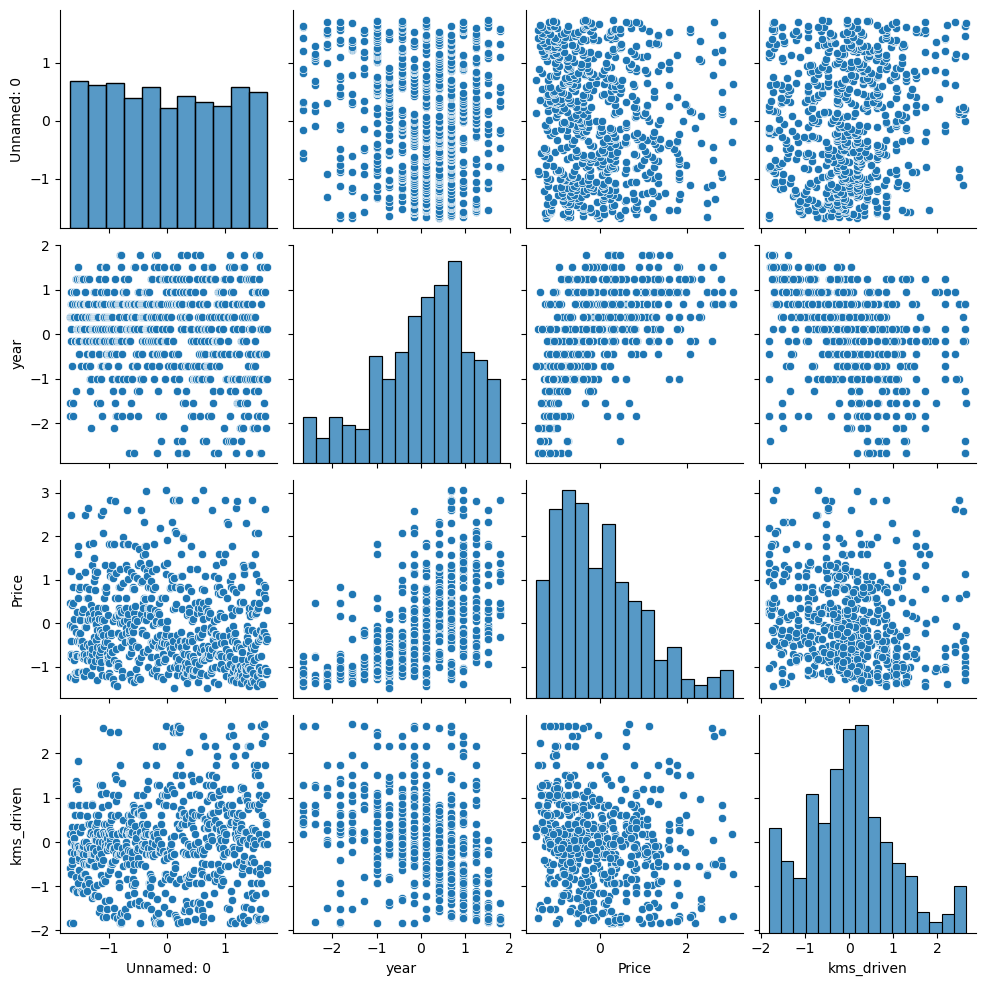

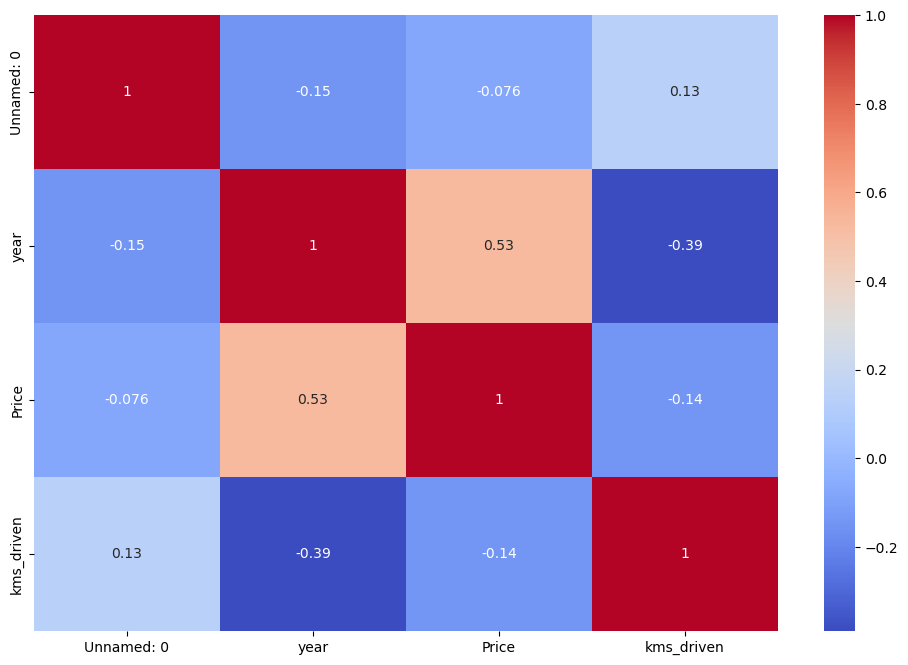

In [6]:
sns.pairplot(df_scaled)
plt.show()

# Check Feature Correlation
corr_matrix = df_scaled.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
X = df_scaled.drop(columns=['Price'])  # Assuming 'Price' is the target variable
y = df_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.6395828680941149
R² Score: 0.22995462544015843


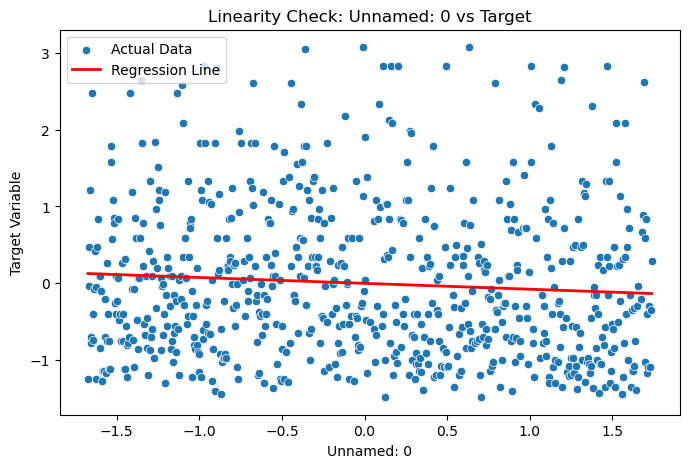

In [33]:


plt.figure(figsize=(8,5))
sns.scatterplot(x=X_single.flatten(), y=y, label="Actual Data")
plt.plot(X_single, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel(feature_name)
plt.ylabel("Target Variable")
plt.title(f"Linearity Check: {feature_name} vs Target")
plt.legend()
plt.show()

In [61]:
print(df.columns)


Index(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'],
      dtype='object')
